In [1]:
# Loading neccesary packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from datetime import timedelta

In [2]:
airbnb_raw = pd.read_csv('data/Jan19-Feb20_listings_with_acessibility.csv')
airbnb_raw.head()

,listing_id,host_id,last_scraped_x,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,calculated_host_listings_count,...,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m
0,2539,2787,2019-01-09,3776,within an hour,100,True,8.0,True,8,...,0.0,5.0,0.0,0.0,3.0,36.0,2.0,21.0,0.0,1.0
1,2539,2787,2019-02-02,3800,within an hour,100,False,8.0,True,8,...,0.0,5.0,0.0,0.0,3.0,36.0,2.0,21.0,0.0,1.0
2,2539,2787,2019-03-07,3833,within an hour,100,False,6.0,True,6,...,0.0,5.0,0.0,0.0,3.0,36.0,2.0,21.0,0.0,1.0
3,2539,2787,2019-04-04,3861,within an hour,100,False,6.0,True,6,...,0.0,5.0,0.0,0.0,3.0,36.0,2.0,21.0,0.0,1.0
4,2539,2787,2019-05-04,3891,within an hour,100,False,6.0,True,6,...,0.0,5.0,0.0,0.0,3.0,36.0,2.0,21.0,0.0,1.0


In [3]:
print(len(airbnb_raw.index))
print(airbnb_raw.columns)
airbnb_raw['last_scraped'] = airbnb_raw['last_scraped_x']
del airbnb_raw['last_scraped_y']
del airbnb_raw['last_scraped_x']

238265
Index(['listing_id', 'host_id', 'last_scraped_x', 'experience',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'neighbourhood',
       'borough', 'property_type', 'room_type', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities_count', 'is_wifi', 'is_kitchen',
       'is_heating', 'is_smoke_detector', 'is_aircon', 'price',
       'security_deposit', 'cleaning_fee', 'price_for_extra_people',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'is_instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 're

In [4]:
print('The initial size of the dataset: ',airbnb_raw.size)
airbnb_raw.info()

The initial size of the dataset:  15725490
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238265 entries, 0 to 238264
Data columns (total 66 columns):
listing_id                                      238265 non-null int64
host_id                                         238265 non-null int64
experience                                      238265 non-null int64
host_response_time                              238265 non-null object
host_response_rate                              238265 non-null int64
host_is_superhost                               238265 non-null bool
host_total_listings_count                       238265 non-null float64
host_identity_verified                          238265 non-null bool
calculated_host_listings_count                  238265 non-null int64
calculated_host_listings_count_entire_homes     238265 non-null int64
calculated_host_listings_count_private_rooms    238265 non-null int64
calculated_host_listings_count_shared_rooms     238265 non-null int64
neigh

In [5]:
#Drop rows with price equal to 0
airbnb_raw = airbnb_raw[airbnb_raw['price']!=0]

In [6]:
#Function to convert dates efficiently
def lookup(s):
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [7]:
airbnb_raw['last_scraped'] = lookup(airbnb_raw['last_scraped'])

In [8]:
print(airbnb_raw['last_scraped'].head())

0   2019-01-09
1   2019-02-02
2   2019-03-07
3   2019-04-04
4   2019-05-04
Name: last_scraped, dtype: datetime64[ns]


In [9]:
airbnb_raw['year'] = airbnb_raw['last_scraped'].dt.year
airbnb_raw['month'] = airbnb_raw['last_scraped'].dt.month
airbnb_raw['day'] = airbnb_raw['last_scraped'].dt.day
airbnb_raw['month_pad'] = airbnb_raw['month'].apply(lambda x : format(x, '02'))
airbnb_raw['yearmonth'] = airbnb_raw['year'].astype(str) + "-" + airbnb_raw['month_pad'].astype(str)

In [10]:
#Number of unique room ids per month to check for homogeneity across observed months
airbnb_raw.groupby(['yearmonth'])['listing_id'].nunique()

yearmonth
2019-01     9312
2019-02     9018
2019-03    11610
2019-04    11027
2019-05    10994
2019-06    11335
2019-07    12056
2019-08    12252
2019-09    11857
2019-10    12059
2019-11    12293
2019-12    12757
2020-01    13328
2020-02    13129
Name: listing_id, dtype: int64

## Adding additional features
1. Weather data
2. Holidays data 
  1. Function *holidays_soon_n_week* can be used to calculate how many holidays from holidays_time dataset will be in coming N weeks for specific date
3. Seasonalisy as dummy variables 

In [11]:
#Add weather data to airbnb_raw dataset
#TAV - average daily temp, TAV_Month - avarage monthly temp
#TDIFF - max difference daily, TDIFF_Month - max difference monthly
#Weather_type - cold/hot/mild and etc.
#TSNOW_Month - total amoint of snow this month

weather = pd.read_excel("data/weather_data/weather_output.xlsx")
weather = weather.rename(columns={"DATE": "last_scraped"}) 
weather['last_scraped'] = lookup(weather['last_scraped'])

weather_use = weather[['last_scraped','TAV','TAV_Month','TDIFF','TDIFF_Month', 'Weather_type', 'TSNOW_Month']]
airbnb_raw = pd.merge(airbnb_raw,weather_use,on=['last_scraped'])

In [12]:
#import holidays set 

us_holidays = holidays.UnitedStates(state='NY', years=[2019, 2020])
holiday_names = []
holiday_dates = []
for holiday in list(us_holidays.items()):
    holiday_dates.append(holiday[0])
    holiday_names.append(holiday[1])
    
holidays_time = pd.DataFrame({
    'holiday': holiday_names,
    'ds': holiday_dates,
})

holidays_time['ds'] = lookup(holidays_time['ds'])

In [13]:
#function that defines how many holidays are in coming N weeks for specific date
def holidays_soon_n_week(date, n):
    s = 0
    delta = timedelta(days = n*7)
    for j in range(0, len(holidays_time)):
        if (holidays_time['ds'].iloc[j] > date) & (holidays_time['ds'].iloc[j] <= (date + delta)):
            s = s + 1
        j = j + 1
    return s

In [14]:
#save unique dates from airbnb listings to separate dataset
dates_raw = pd.DataFrame()
dates_raw['last_scraped'] = airbnb_raw['last_scraped'].unique()

#loop to create column with Number of holidays for each date in column 
dates_raw['holidays'] = ''
for i in range(0,len(dates_raw)):
    dates_raw['holidays'].iloc[i] = holidays_soon_n_week(dates_raw['last_scraped'].iloc[i],4)
    i = i + 1

/home/toshal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
airbnb_raw = pd.merge(airbnb_raw,dates_raw,on=['last_scraped'])

In [16]:
#seasonality

months = airbnb_raw['month'].unique()
seasons = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Autumn','Autumn','Autumn','Winter']
month_season = pd.DataFrame({
    'month': months,
    'season': seasons
})

month_season = pd.get_dummies(month_season)

In [17]:
airbnb_raw = pd.merge(airbnb_raw,month_season,on=['month'])

In [18]:
pd.options.display.max_columns = None
airbnb_raw.head()

,listing_id,host_id,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,borough,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities_count,is_wifi,is_kitchen,is_heating,is_smoke_detector,is_aircon,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,number_of_reviews,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,last_scraped,year,month,day,month_pad,yearmonth,TAV,TAV_Month,TDIFF,TDIFF_Month,Weather_type,TSNOW_Month,holidays,season_Autumn,season_Spring,season_Summer,season_Winter
0,2539,2787,3776,within an hour,100,True,8.0,True,8,0,5,3,Kensington,Brooklyn,Apartment,Private room,1.0,1.0,1.0,Real Bed,44,True,True,True,True,False,149.0,100.0,25.0,25.0,1,1,730,True,30,60,90,365,False,False,moderate,False,False,9,0.24,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,40.647486,-73.972370,0.0,5.0,0.0,0.0,3.0,36.0,2.0,21.0,0.0,1.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1
1,2595,2845,3774,within a day,60,False,5.0,True,2,1,0,1,Midtown,Manhattan,Apartment,Entire home/apt,1.0,0.0,1.0,Real Bed,36,True,True,True,True,True,225.0,350.0,100.0,0.0,2,1,1125,True,30,60,90,365,False,False,strict_14_with_grace_period,True,True,43,0.39,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0,40.753621,-73.983774,2.0,15.0,0.0,30.0,7.0,361.0,1.0,46.0,4.0,28.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1
2,3330,4177,3713,within a day,100,False,4.0,True,3,0,3,0,Williamsburg,Brooklyn,Apartment,Private room,1.0,1.0,1.0,Real Bed,25,True,True,True,True,False,70.0,150.0,125.0,50.0,2,5,730,True,1,10,40,282,False,False,strict_14_with_grace_period,False,False,39,0.36,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,40.708558,-73.942362,0.0,10.0,0.0,2.0,1.0,63.0,0.0,30.0,0.0,0.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1
3,5238,7549,3623,within a day,92,True,4.0,True,4,2,0,2,Chinatown,Manhattan,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,27,True,True,True,True,True,150.0,0.0,40.0,10.0,2,1,1125,True,13,26,46,291,False,False,strict_14_with_grace_period,False,False,152,1.33,8,93.0,9.0,9.0,10.0,10.0,9.0,9.0,40.713444,-73.990375,1.0,5.0,0.0,10.0,15.0,235.0,2.0,49.0,0.0,10.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1
4,5295,7702,3620,within a day,92,False,1.0,True,1,1,0,0,Upper West Side,Manhattan,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,21,True,True,True,True,True,135.0,450.0,75.0,0.0,1,5,365,True,11,29,59,87,False,False,strict_14_with_grace_period,False,False,43,0.37,6,94.0,10.0,9.0,10.0,10.0,9.0,9.0,40.803158,-73.965446,1.0,6.0,0.0,2.0,9.0,86.0,3.0,27.0,0.0,3.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1


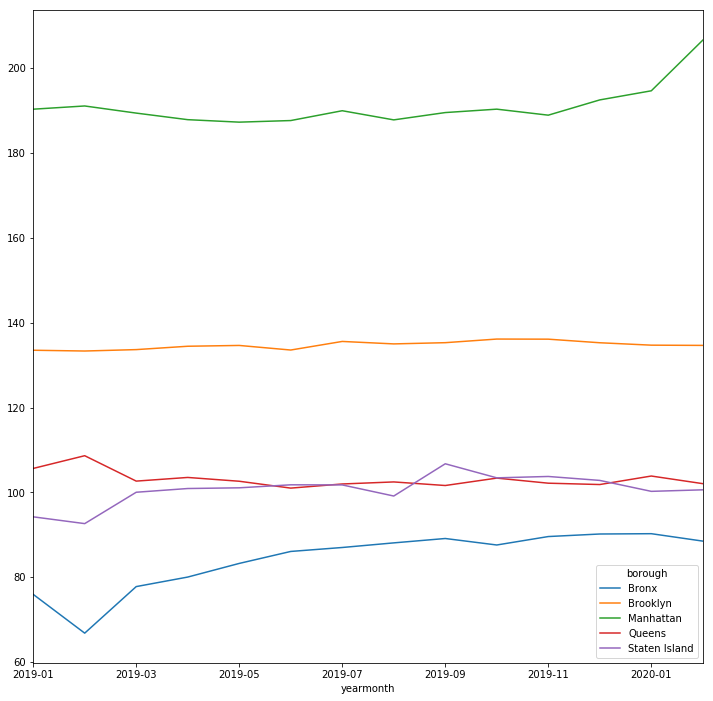

In [19]:
#Development in average price per month per borough
fig, ax = plt.subplots(figsize=(12,12))
airbnb_raw.groupby(['yearmonth','borough']).mean()['price'].unstack().plot(ax=ax)
plt.savefig("comparing_prices_in_borough.png",dpi=300)
plt.show()

In [20]:
#Convert boolean values into 0/1
def get_binary(x):
    if x is True:
        return 1
    else: 
        return 0

airbnb_raw['has_availability'] = airbnb_raw['has_availability'].apply(lambda x: get_binary(x))
airbnb_raw['is_instant_bookable'] = airbnb_raw['is_instant_bookable'].apply(lambda x: get_binary(x))
airbnb_raw['is_business_travel_ready'] = airbnb_raw['is_business_travel_ready'].apply(lambda x: get_binary(x))
airbnb_raw['is_wifi'] = airbnb_raw['is_wifi'].apply(lambda x: get_binary(x))
airbnb_raw['is_kitchen'] = airbnb_raw['is_kitchen'].apply(lambda x: get_binary(x))
airbnb_raw['is_heating'] = airbnb_raw['is_heating'].apply(lambda x: get_binary(x))
airbnb_raw['is_smoke_detector'] = airbnb_raw['is_smoke_detector'].apply(lambda x: get_binary(x))
airbnb_raw['is_aircon'] = airbnb_raw['is_aircon'].apply(lambda x: get_binary(x))
airbnb_raw['host_is_superhost'] = airbnb_raw['host_is_superhost'].apply(lambda x: get_binary(x))

In [21]:
#converting neighborhood and borough into values
# print(airbnb_raw['neighbourhood'].unique())
# print(airbnb_raw['borough'].unique())
airbnb_raw['cat_neighbourhood'] = airbnb_raw['neighbourhood'].astype('category').cat.codes
airbnb_raw['cat_property_type'] = airbnb_raw['property_type'].astype('category').cat.codes
airbnb_raw['cat_weather_type'] = airbnb_raw['Weather_type'].astype('category').cat.codes

airbnb_raw = pd.concat((airbnb_raw, pd.get_dummies(airbnb_raw['borough'], drop_first=True)), axis=1)
airbnb_raw = pd.concat((airbnb_raw, pd.get_dummies(airbnb_raw['cancellation_policy'], drop_first=True)), axis=1)
airbnb_raw = pd.concat((airbnb_raw, pd.get_dummies(airbnb_raw['host_response_time'], drop_first=True)), axis=1)
airbnb_raw = pd.concat((airbnb_raw, pd.get_dummies(airbnb_raw['room_type'], drop_first=True)), axis=1)

airbnb_raw = airbnb_raw.drop(['borough', 'cancellation_policy', 'host_response_time', 'room_type'], axis=1)

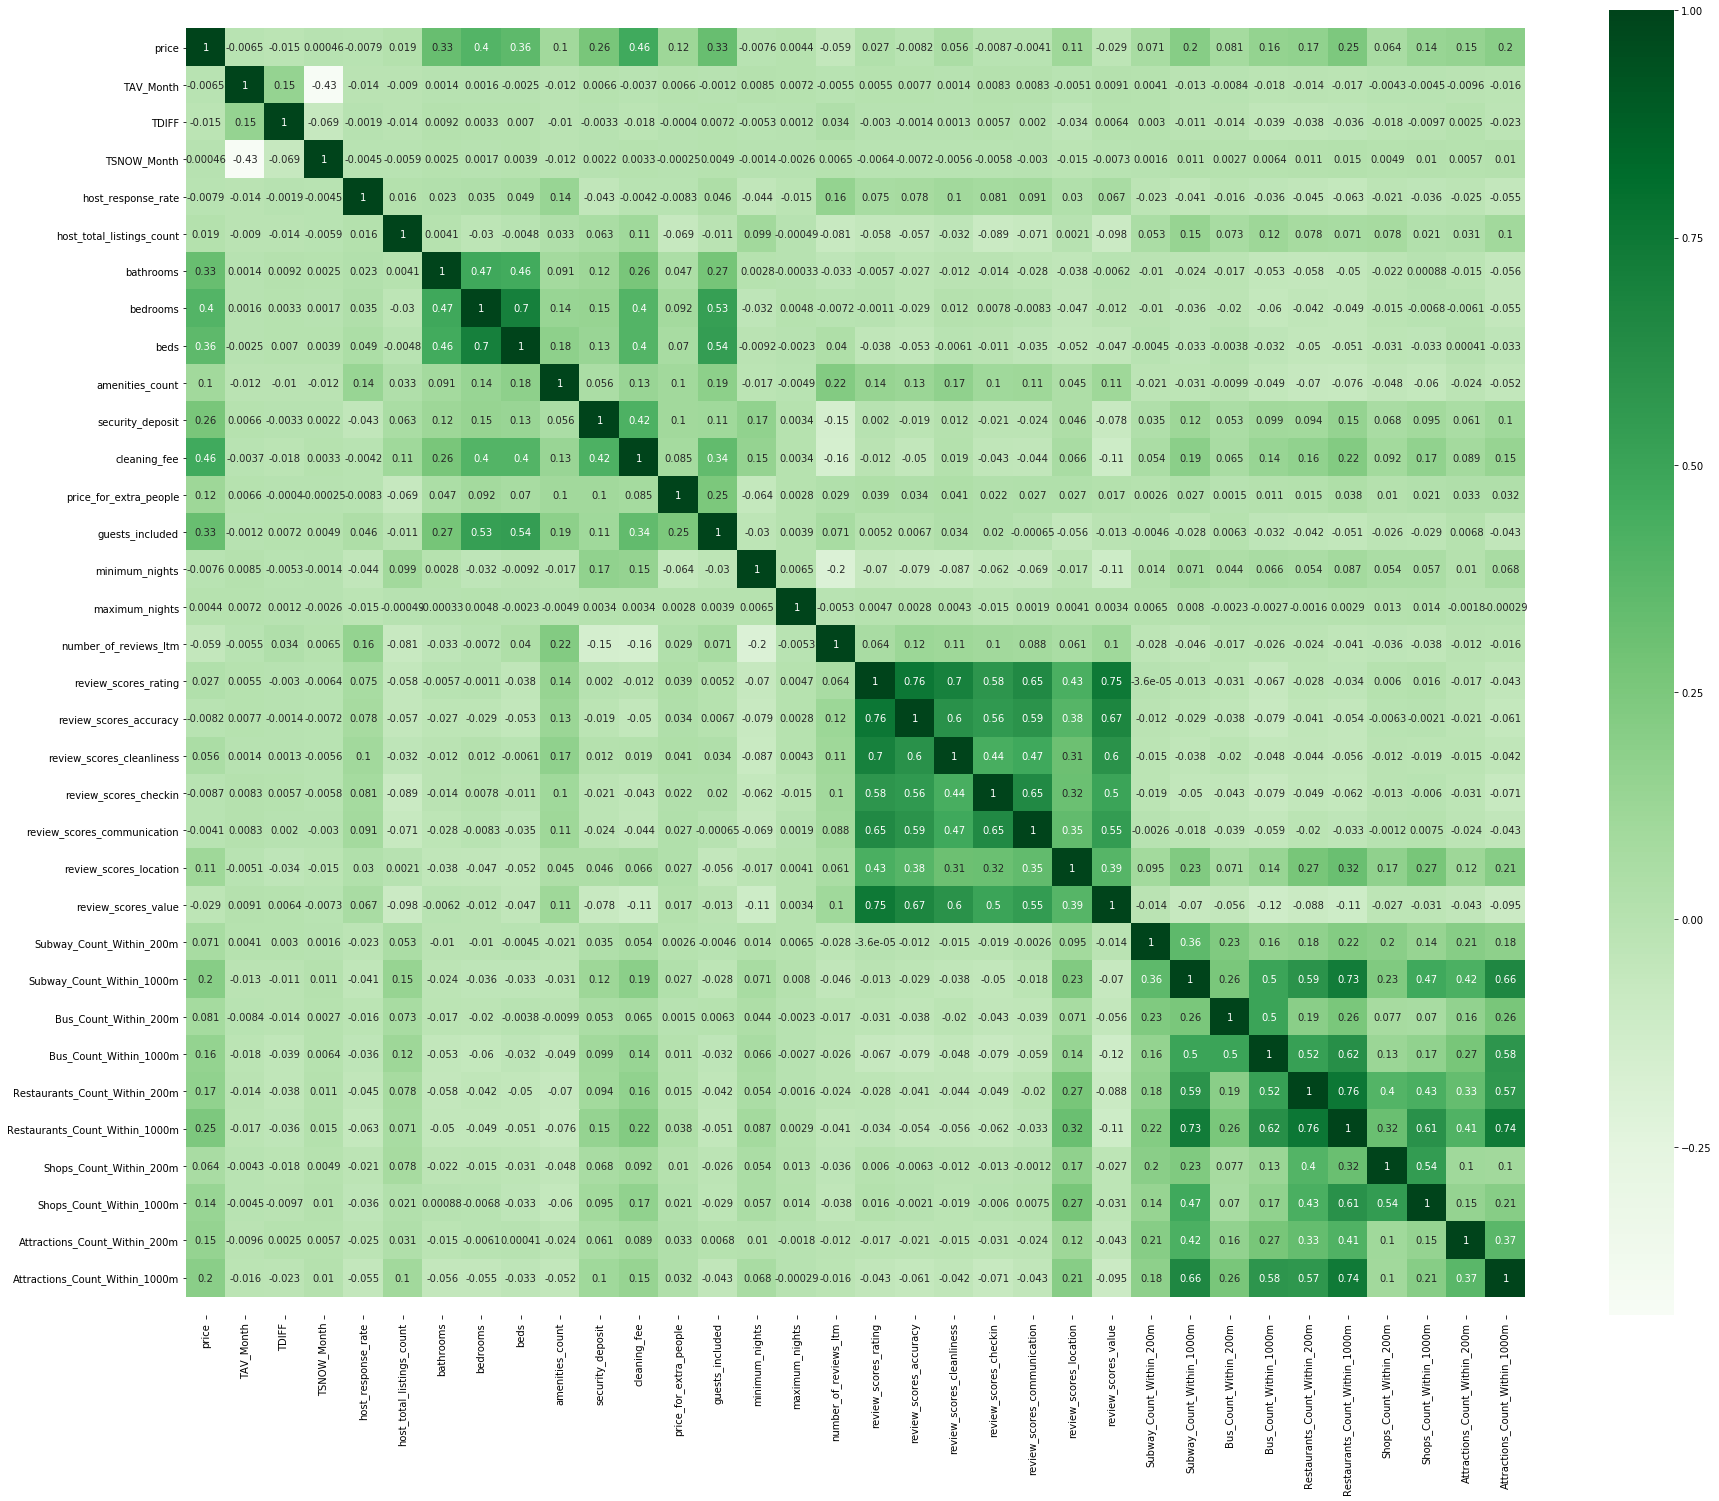

In [22]:
#Correlation matrix for relevant columns 
imp_cols = "price, TAV_Month, TDIFF, TSNOW_Month, host_response_rate,host_total_listings_count,bathrooms,bedrooms,beds, \
amenities_count, security_deposit, cleaning_fee, price_for_extra_people, guests_included, minimum_nights, maximum_nights, \
number_of_reviews_ltm, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin,\
review_scores_communication, review_scores_location, review_scores_value "
imp_cols = imp_cols.replace(" ","")
cols = imp_cols.split(",")

accessibility_cols = ['Subway_Count_Within_200m', 'Subway_Count_Within_1000m',
       'Bus_Count_Within_200m', 'Bus_Count_Within_1000m',
       'Restaurants_Count_Within_200m', 'Restaurants_Count_Within_1000m',
       'Shops_Count_Within_200m', 'Shops_Count_Within_1000m',
       'Attractions_Count_Within_200m', 'Attractions_Count_Within_1000m']

cols = cols + accessibility_cols

corrmat = airbnb_raw[cols].corr()
f, ax = plt.subplots(figsize=(30,24))
sns.heatmap(corrmat, annot=True, cmap = 'Greens')

# Fix box height
b, t = plt.ylim()
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.savefig('Correlation_matrix.png', dpi=300)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

['price', 'TAV_Month', 'TDIFF', 'host_total_listings_count', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'price_for_extra_people', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'Subway_Count_Within_200m', 'Subway_Count_Within_1000m', 'Bus_Count_Within_200m', 'Bus_Count_Within_1000m', 'Restaurants_Count_Within_200m', 'Restaurants_Count_Within_1000m', 'Shops_Count_Within_200m', 'Shops_Count_Within_1000m', 'Attractions_Count_Within_200m', 'Attractions_Count_Within_1000m']
27


IndexError: index 5 is out of bounds for axis 0 with size 5

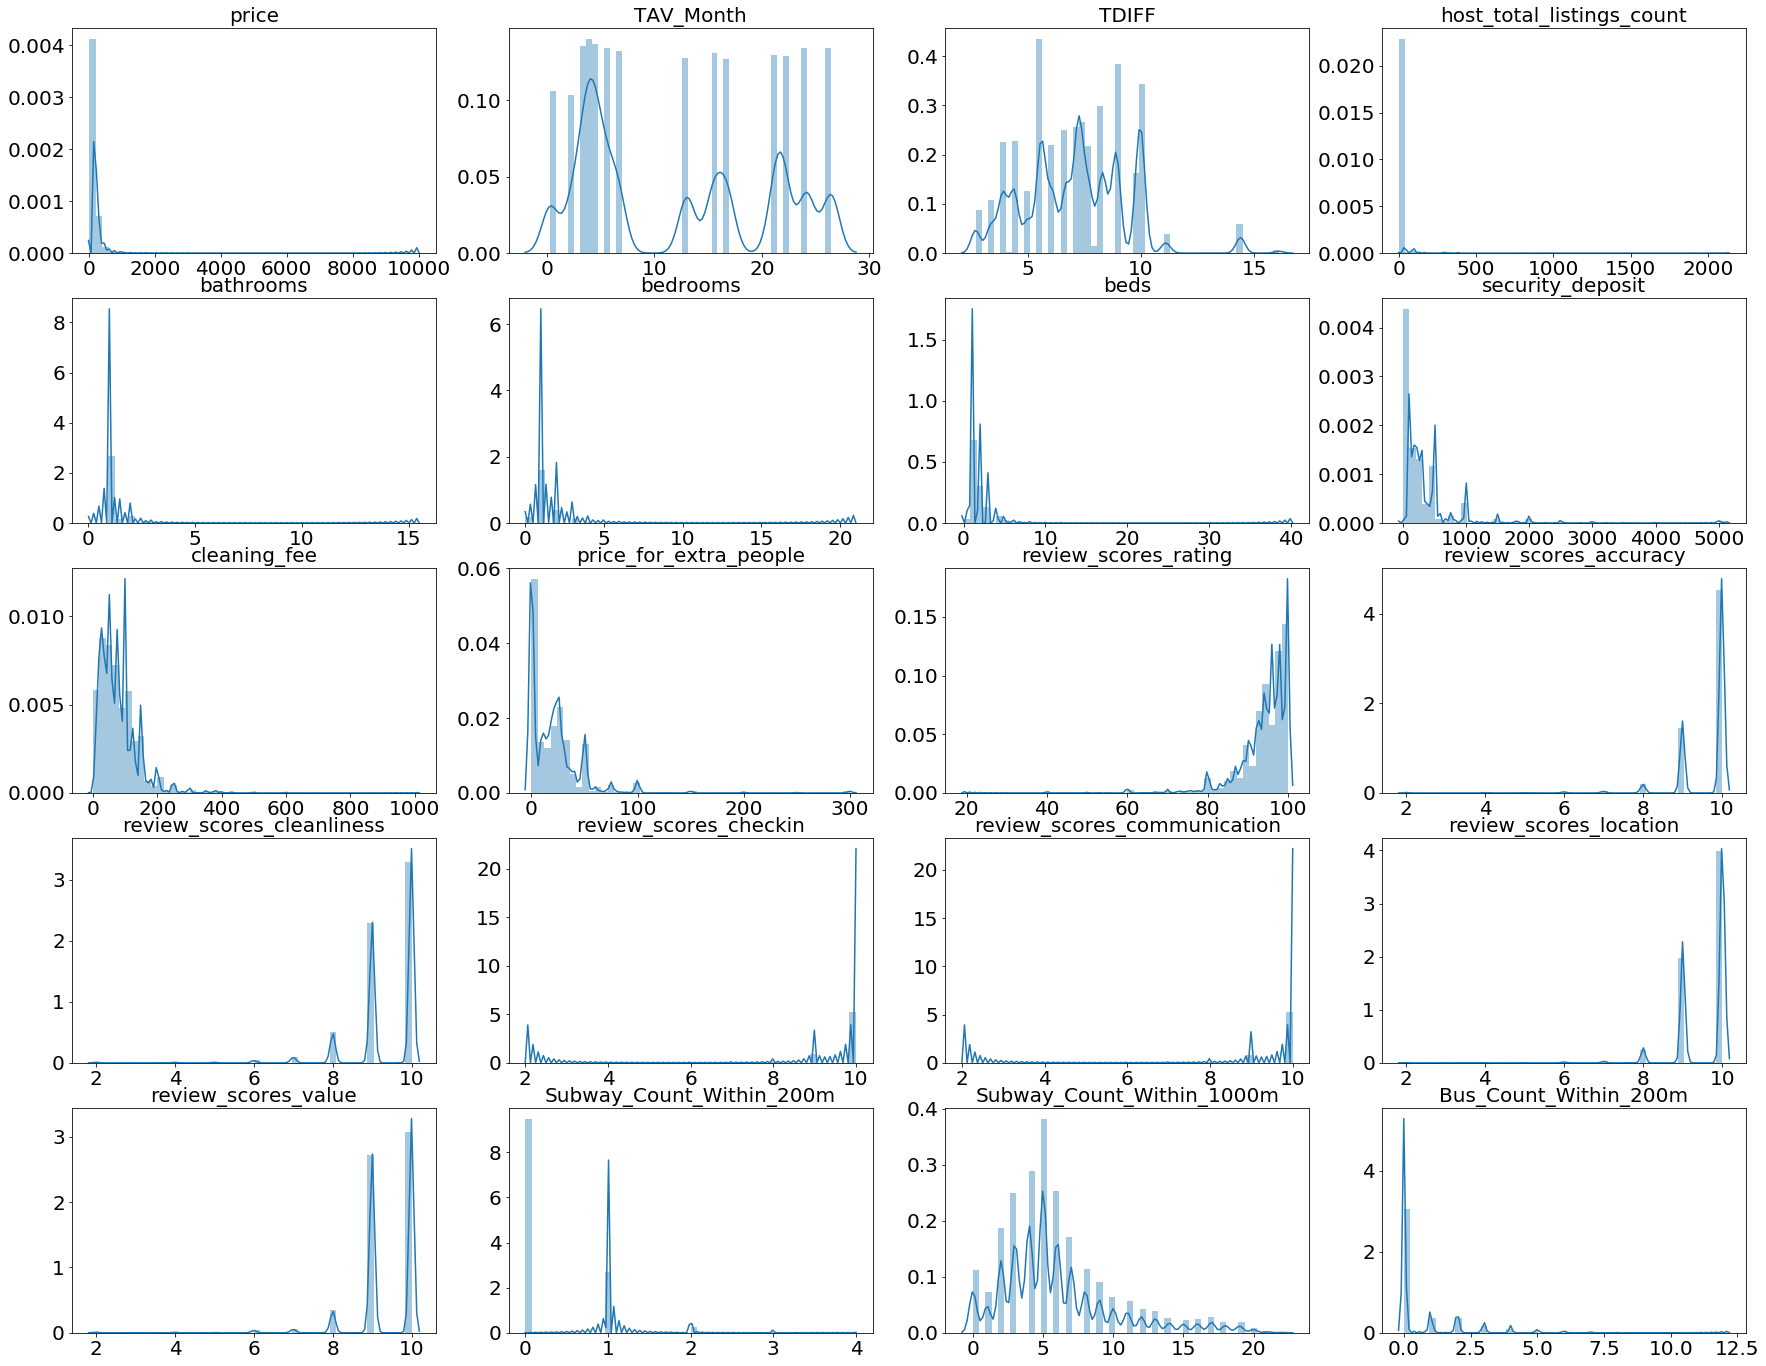

In [23]:
#Distribution plots 

def is_float(colu):
    col = airbnb_raw[colu]
    for item in col:
        if isinstance(item,float):
            return True
        else:
            return False

print([i for i in airbnb_raw[cols] if is_float(i)])
airbnb_raw_f = airbnb_raw[[i for i in airbnb_raw[cols] if is_float(i)]]
print(len(airbnb_raw_f.columns))

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30,24))
for i, column in enumerate(airbnb_raw_f.columns):
    b = sns.distplot(airbnb_raw_f[column],ax=axes[i//4,i%4], axlabel=False)
    b.axes.set_title(column, fontsize=20)
plt.savefig('distribution_plot.png', dpi=300)
plt.show()

# Exploring outliers in price variable

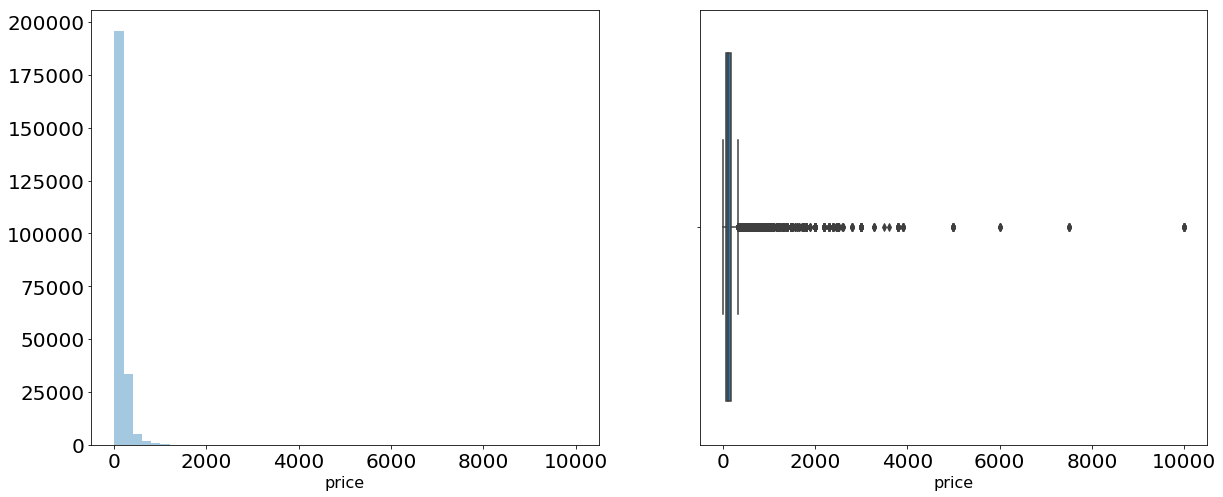

In [105]:
#Price has extreme outliers, and is very skewed
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax = sns.distplot(airbnb_raw['price'], kde=False, ax=axes[0], axlabel=False)
ax.set_xlabel('price',fontsize=16)
ax = sns.boxplot(x='price', data=airbnb_raw,ax=axes[1])
ax.set_xlabel('price',fontsize=16)
plt.savefig("price_with_outliers.png",dpi=300)
plt.show()

In [25]:
print(airbnb_raw['price'].count())
print(airbnb_raw['price'].skew())
print(airbnb_raw['price'].mean())

238121
17.645317412607174
154.27014417040076


## Remove price outliers - IQR approach
All rows with prices exceeding  75th percentile + 3*IQR are excluded
IQR = Interquartile range

In [26]:
q1_price = np.percentile(airbnb_raw['price'], 25, interpolation='midpoint')
q3_price = np.percentile(airbnb_raw['price'], 75, interpolation='midpoint')
iqr = q3_price - q1_price
print(iqr)

105.0


In [27]:
print("Number of outliers:", airbnb_raw[airbnb_raw['price']>(3*iqr)]['price'].count())
print('New size of the dataset: ',airbnb_raw[airbnb_raw['price']<=(3*iqr)]['price'].count())
print("Old mean:", round(airbnb_raw['price'].mean(),2))
print("New mean:", round(airbnb_raw[airbnb_raw['price']<(3*iqr)]['price'].mean(),2))

Number of outliers: 15841
New size of the dataset:  222280
Old mean: 154.27
New mean: 124.69


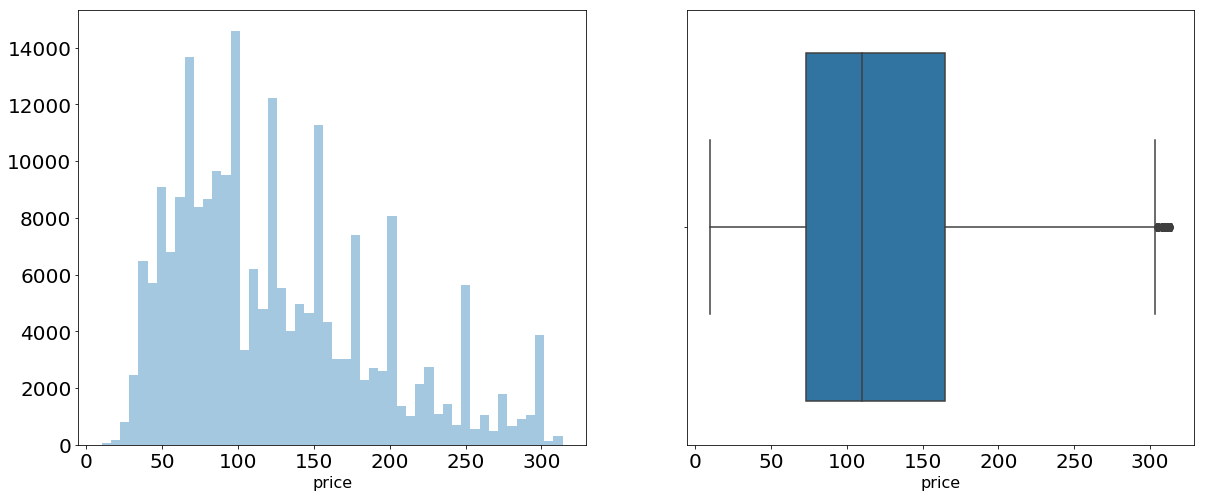

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax = sns.distplot(airbnb_raw[airbnb_raw['price']<(3*iqr)]['price'], kde=False, ax=axes[0])
ax.set_xlabel('price',fontsize=16)
ax = sns.boxplot(x='price', data=airbnb_raw[airbnb_raw['price']<(3*iqr)],ax=axes[1])
ax.set_xlabel('price',fontsize=16)
plt.savefig("price_without_outliers.png",dpi=300)
plt.show()

## Price outliers Log transformation approach
All rows are included, price value is log transformed (used to move skewed data towards normality)

(Scientifically correct way of handling right-skewed data)

In [29]:
airbnb_raw['price'].skew()

17.645317412607174

In [30]:
np.log(airbnb_raw['price']).skew()

0.47935951049392517

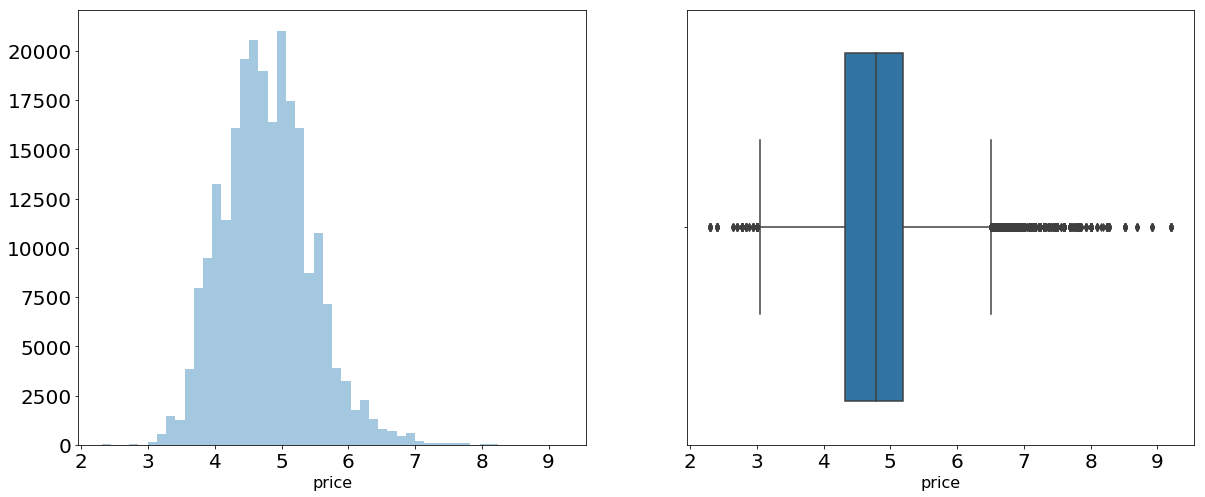

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax = sns.distplot(np.log(airbnb_raw['price']), kde=False, ax=axes[0])
ax.set_xlabel('price',fontsize=16)
ax = sns.boxplot(np.log(airbnb_raw['price']),ax=axes[1])
ax.set_xlabel('price',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

#### It is decided to use the first method of simply removing outliers, and thus focus on the remaining listings (just abov 90% of the entire dataset)
This is because working with linear regressions on log-transformed data cannot be anti-logged

In [82]:
airbnb_final = airbnb_raw[airbnb_raw['price']<=(3*iqr)]
#airbnb_final.info()

airbnb_final['price'].max()
len(airbnb_raw[airbnb_raw['price']<350])/len(airbnb_raw.index)

0.9422646469651984

In [33]:
pd.options.display.max_columns = None
airbnb_final.head()

,listing_id,host_id,experience,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,property_type,bathrooms,bedrooms,beds,bed_type,amenities_count,is_wifi,is_kitchen,is_heating,is_smoke_detector,is_aircon,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,number_of_reviews,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,last_scraped,year,month,day,month_pad,yearmonth,TAV,TAV_Month,TDIFF,TDIFF_Month,Weather_type,TSNOW_Month,holidays,season_Autumn,season_Spring,season_Summer,season_Winter,cat_neighbourhood,cat_property_type,cat_weather_type,Brooklyn,Manhattan,Queens,Staten Island,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,within a day,within a few hours,within an hour,Hotel room,Private room,Shared room
0,2539,2787,3776,100,1,8.0,True,8,0,5,3,Kensington,Apartment,1.0,1.0,1.0,Real Bed,44,1,1,1,1,0,149.0,100.0,25.0,25.0,1,1,730,1,30,60,90,365,0,0,False,False,9,0.24,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,40.647486,-73.972370,0.0,5.0,0.0,0.0,3.0,36.0,2.0,21.0,0.0,1.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1,103,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,2595,2845,3774,60,0,5.0,True,2,1,0,1,Midtown,Apartment,1.0,0.0,1.0,Real Bed,36,1,1,1,1,1,225.0,350.0,100.0,0.0,2,1,1125,1,30,60,90,365,0,0,True,True,43,0.39,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0,40.753621,-73.983774,2.0,15.0,0.0,30.0,7.0,361.0,1.0,46.0,4.0,28.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1,120,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,3330,4177,3713,100,0,4.0,True,3,0,3,0,Williamsburg,Apartment,1.0,1.0,1.0,Real Bed,25,1,1,1,1,0,70.0,150.0,125.0,50.0,2,5,730,1,1,10,40,282,0,0,False,False,39,0.36,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,40.708558,-73.942362,0.0,10.0,0.0,2.0,1.0,63.0,0.0,30.0,0.0,0.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1,201,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,5238,7549,3623,92,1,4.0,True,4,2,0,2,Chinatown,Apartment,1.0,1.0,2.0,Real Bed,27,1,1,1,1,1,150.0,0.0,40.0,10.0,2,1,1125,1,13,26,46,291,0,0,False,False,152,1.33,8,93.0,9.0,9.0,10.0,10.0,9.0,9.0,40.713444,-73.990375,1.0,5.0,0.0,10.0,15.0,235.0,2.0,49.0,0.0,10.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1,31,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,5295,7702,3620,92,0,1.0,True,1,1,0,0,Upper West Side,Apartment,1.0,1.0,1.0,Real Bed,21,1,1,1,1,1,135.0,450.0,75.0,0.0,1,5,365,1,11,29,59,87,0,0,False,False,43,0.37,6,94.0,10.0,9.0,10.0,10.0,9.0,9.0,40.803158,-73.965446,1.0,6.0,0.0,2.0,9.0,86.0,3.0,27.0,0.0,3.0,2019-01-09,2019,1,9,01,2019-01,4.15,0.322581,6.1,16.0,cold,28,1,0,0,0,1,190,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [34]:
print(airbnb_final['price'].count())
print(airbnb_final['price'].skew())
print(airbnb_final['price'].mean())

222280
0.8166506697414849
124.7651655569552


## Principle Component Analysis (PCA) for accessibility measures
Since the accessibility measures are highly correlated, we are going to try to reduce the number of featues by conducting PCA (Principle Component Analysis). These all have the same unit, thus we do not necessarily have to normalize the data, which would be the traditional practice before PCA. The aim is to reduce the number of features, while maintaining the same level of information (98% of the initial variance).

First, we extract the relevant features and transpose them to fit the format for PCA. 

In [35]:
accessibility_PCA = airbnb_final[['accesibility features','acc_2','acc_3','etc.']];
# INCLUDE INDEX
accessibility_PCA = accessibility_PCA.T
accessibility_PCA.head()

KeyError: "None of [Index(['accesibility features', 'acc_2', 'acc_3', 'etc.'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn import decomposition

pca=decomposition.PCA()
pca.fit(accessibility_PCA)

Sorts and prints components depending on variance explained

In [ ]:
expl=pca.explained_variance_ratio_
expl

In [ ]:
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf);
plt.title('Figure 4: Cumulative Variance Explained')
plt.xlabel('Principal component')
plt.ylabel('Variance Explained')
cdf[:10] # printing the first 10 components ordered by explaied variance.

In [ ]:
# INCLUDE IN FINAL AIRBNB DATASET
airbnb_final['PCA_access'] = pca.components_[0]

# Preparing data for prediction

In [108]:
from sklearn.model_selection import train_test_split

#Splitting and shuffling data
prediction_data = airbnb_final.drop(['listing_id', 'host_id', 'last_scraped', 'experience', 'host_identity_verified', 'neighbourhood', 
                                     'property_type', 'bed_type', 'require_guest_profile_picture', 'require_guest_phone_verification', 
                                     'year', 'month', 'day', 'month_pad', 'yearmonth','latitude','longitude', 'Weather_type'], axis=1)
features_using = prediction_data.drop(['price'],axis=1).columns
predicting = ['price']

train, test = train_test_split(prediction_data, train_size=0.8, shuffle=True) #Test set is approx 20% of total
train, val = train_test_split(train, train_size=0.8, shuffle=True) #Validation set is approx 16% of total, train set is approx 64% of total

X_train, y_train = train[features_using], train[predicting]
X_val, y_val = val[features_using], val[predicting]
X_test, y_test = test[features_using], test[predicting]
print(len(X_train.columns))

77


### Function to evaluate predictions

In [37]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from statistics import mean

def evaluate(y_true, y_pred):
    y_true = y_true['price'].tolist()
    print("MSE: ", round(mean_squared_error(y_true, y_pred), 4))
    print("RMSE: ", round(math.sqrt(mean_squared_error(y_true, y_pred)), 4))
    RMSE = math.sqrt(mean_squared_error(y_true, y_pred))    
    mean_y_true = mean(y_true)
    print("RRMSE: ",round(RMSE*(100/mean_y_true), 4))    
    #print("MAE: ", round(mean_absolute_error(y_true, y_pred), 4))
    print("R2: ", round(r2_score(y_true, y_pred), 4))

# Baseline calculations
1. Set avg. of training set as default prediction
2. Simple linear regression model

###### INTERPRETATION OF RRMSE: 
RMSE is stated in the same units of the original measurement, so if you are comparing distance measuring techniques, you might have an RMSE of 0.29 meters. If you're measuring mountain height or river distances then this is a tiny amount of inaccuracy, perhaps 0.005%. If you're measuring people's height, then you're about 17% off. That percentage variation in accuracy is RRMSE.

calculated by dividing the RMSE by the mean observed data

Reference: https://stats.stackexchange.com/questions/260615/what-is-the-difference-between-rrmse-and-rmsre

In [74]:
#Using plain average
y_pred = [y_train['price'].mean()] * len(y_test)
print("- Test set results:")
print("Predicted mean price:", round(y_train['price'].mean(),2))
print("Test set mean price:", round(y_test['price'].mean()),2)
evaluate(y_test, y_pred)

- Test set results:
Predicted mean price: 124.84
Test set mean price: 125 2
MSE:  4330.6914
RMSE:  65.808
RRMSE:  52.836
R2:  -0.0
Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'bathrooms', 'bedrooms',
       'beds', 'amenities_count', 'is_wifi', 'is_kitchen', 'is_heating',
       'is_smoke_detector', 'is_aircon', 'security_deposit', 'cleaning_fee',
       'price_for_extra_people', 'guests_included', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'is_instant_bookable', 'is_business_travel_ready', 'number_of_reviews',
       'reviews_per_month', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanlin

### Multiple linear regression

In [39]:
#Predicting price with all available variables
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train.drop(['cat_neighbourhood', 'cat_property_type'],axis=1), y_train.values.ravel())

y_pred_train = lr.predict(X_train.drop(['cat_neighbourhood', 'cat_property_type'],axis=1))
y_pred_val = lr.predict(X_val.drop(['cat_neighbourhood', 'cat_property_type'],axis=1))

print("- Train set results:")
evaluate(y_train, y_pred_train)
print('\n')
print("- Validation set results:")
evaluate(y_val, y_pred_val)

- Train set results:
MSE:  1682.3631
RMSE:  41.0166
RRMSE:  32.8212
R2:  0.6133


- Validation set results:
MSE:  1670.881
RMSE:  40.8764
RRMSE:  32.8955
R2:  0.6134


In [40]:
#Using wrapper method with backward elimination based on p-value > 0.05 for feature selection
#Reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
import statsmodels.api as sm

cols = list(X_train.drop(['cat_neighbourhood', 'cat_property_type'],axis=1).columns)

pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values, index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
significant_features = cols
print(significant_features)
print(len(significant_features))

/home/toshal/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['host_response_rate', 'host_is_superhost', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'bathrooms', 'bedrooms', 'beds', 'amenities_count', 'is_wifi', 'is_heating', 'is_aircon', 'security_deposit', 'cleaning_fee', 'price_for_extra_people', 'guests_included', 'minimum_nights', 'has_availability', 'availability_30', 'availability_90', 'availability_365', 'is_instant_bookable', 'is_business_travel_ready', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'Subway_Count_Within_200m', 'Bus_Count_Within_1000m', 'Restaurants_Count_Within_1000m', 'Shops_Count_Within_200m', 'Shops_Count_Within_1000m', 'Attractions_Count_Within_200m', 'Attra

In [41]:
print("Insignificant features:")
X_train.drop(significant_features, axis=1).columns

Insignificant features:


Index(['is_kitchen', 'is_smoke_detector', 'maximum_nights', 'availability_60',
       'Subway_Count_Within_1000m', 'Bus_Count_Within_200m',
       'Restaurants_Count_Within_200m', 'TAV', 'TDIFF', 'TSNOW_Month',
       'cat_neighbourhood', 'cat_property_type', 'cat_weather_type',
       'super_strict_30'],
      dtype='object')

In [42]:
#Predicting price with all significant variables SCIKIT VERSION

lr2 = LinearRegression()
lr2.fit(X_train[significant_features], y_train.values.ravel())

y_pred_train2 = lr2.predict(X_train[significant_features])
y_pred_val2 = lr2.predict(X_val[significant_features])
y_pred_test2 = lr2.predict(X_test[significant_features])

print("- Train set results:")
evaluate(y_train, y_pred_train2)
print('\n')
print("- Validation set results:")
evaluate(y_val, y_pred_val2)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test2)

- Train set results:
MSE:  1682.515
RMSE:  41.0185
RRMSE:  32.8227
R2:  0.6133


- Validation set results:
MSE:  1670.799
RMSE:  40.8754
RRMSE:  32.8947
R2:  0.6135


- Test set results:
MSE:  1690.7879
RMSE:  41.1192
RRMSE:  33.0241
R2:  0.6097


In [43]:
#Predicting price with all significant variables STATSMODEL VERSION

X_1 = X_train[significant_features]
X_1 = sm.add_constant(X_1)
model2 = sm.OLS(y_train,X_1).fit()

#lr2 = LinearRegression()
#lr2.fit(X_train[significant_features], y_train.values.ravel())

y_pred_train2 = model2.predict(X_train[significant_features])
y_pred_test2 = model2.predict(X_test[significant_features])

print("- Train set results:")
evaluate(y_train, y_pred_train2)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test2)

/home/toshal/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


- Train set results:
MSE:  1682.515
RMSE:  41.0185
RRMSE:  32.8227
R2:  0.6133


- Test set results:
MSE:  1690.7879
RMSE:  41.1192
RRMSE:  33.0241
R2:  0.6097


In [44]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     3759.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:15:19   Log-Likelihood:            -7.3021e+05
No. Observations:              142259   AIC:                         1.461e+06
Df Residuals:                  142198   BIC:                         1.461e+06
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_response_rate                               0.0382      0.013      2.952      0.003       0.013       0.063
host_is_superhost                                4.6277      0.257     17.991      0.000       4.124       5.132
host_total_listings_count                        0.0204      0.004      5.244      0.000       0.013       0.028
calculated_host_listings_count                   0.6551      0.247      2.654      0.008       0.171       1.139
calculated_host_listings_count_entire_homes     -0.7470      0.247     -3.021      0.003      -1.232      -0.262
calculated_host_listings_count_private_rooms    -0.7782      0.249     -3.127      0.002      -1.266      -0.290
calculated_host_listings_count_shared_rooms     -2.3162      0.286     -8.112      0.000      -2.876      -1.757
bathrooms                                        8.0469      0.308     26.096      0.000       7.443       8.651
bedrooms                                        16.0593      0.207     77.602      0.000      15.654      16.465
beds                                             3.2331      0.137     23.549      0.000       2.964       3.502
amenities_count                                  0.2098      0.012     17.128      0.000       0.186       0.234
is_wifi                                         -3.3118      1.190     -2.784      0.005      -5.644      -0.980
is_heating                                      -2.1293      0.727     -2.929      0.003      -3.554      -0.704
is_aircon                                        6.7679      0.389     17.401      0.000       6.006       7.530
security_deposit                                 0.0018      0.000      6.607      0.000       0.001       0.002
cleaning_fee                                     0.1341      0.003     47.237      0.000       0.129       0.140
price_for_extra_people                           0.0370      0.004      8.243      0.000       0.028       0.046
guests_included                                  8.0206      0.120     66.673      0.000       7.785       8.256
minimum_nights                                  -0.4131      0.007    -57.455      0.000      -0.427      -0.399
has_availability                               -29.9606      2.405    -12.457      0.000     -34.675     -25.246
availability_30                                  0.3793      0.019     19.876      0.000       0.342       0.417
availability_90                                  0.0262      0.007      3.768      0.000       0.013       0.040
availability_365                                 0.0072      0.001      6.625      0.000       0.005       0.009
is_instant_bookable                              1.5178      0.252      6.031      0.000       1.025       2.011
is_business_travel_ready        

In [109]:
file = open("ols_regression_ouput.csv","w")
file.write(model.summary().as_csv())
file.close()

# Random forest

In [132]:
# Randomized search for best params using cross validation
# Reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Hyper parameter tuning: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid search lists
param_grid = {
    'max_features': list(range(2,len(features_using),15)),
    'max_depth': list(range(2,len(features_using),15)),
    'n_estimators': [200, 300, 500],
    'min_samples_leaf': list(range(5,100,30))
}

rf2 = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = param_grid, n_iter = 50, cv = 3, verbose=1, n_jobs = -1)
rf_random.fit(X_train, y_train.values.ravel())
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
/home/toshal/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/toshal/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/toshal/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home

{'n_estimators': 200,
 'min_samples_leaf': 5,
 'max_features': 62,
 'max_depth': 32}

In [133]:
print("tuned hyperparameters :",rf_random.best_params_)
print("accuracy :",rf_random.best_score_)

tuned hyperparameters : {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': 62, 'max_depth': 32}
accuracy : 0.9342523693397908


In [1]:
from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(n_estimators=200, max_features=62, min_samples_leaf=5, max_depth=32, random_state = 42)
rf3.fit(X_train, y_train.values.ravel())

y_pred_train = rf3.predict(X_train)
y_pred_test = rf3.predict(X_test)

print("- Train set results:")
evaluate(y_train, y_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test)

NameError: name 'X_train' is not defined

In [135]:
# Get numerical feature importances
importances = list(rf3.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_using, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Private room         Importance: 0.25
Variable: calculated_host_listings_count_entire_homes Importance: 0.11
Variable: cleaning_fee         Importance: 0.09
Variable: Restaurants_Count_Within_1000m Importance: 0.09
Variable: bedrooms             Importance: 0.08
Variable: calculated_host_listings_count_private_rooms Importance: 0.07
Variable: Attractions_Count_Within_1000m Importance: 0.04
Variable: guests_included      Importance: 0.03
Variable: bathrooms            Importance: 0.02
Variable: beds                 Importance: 0.02
Variable: minimum_nights       Importance: 0.02
Variable: Shared room          Importance: 0.02
Variable: host_total_listings_count Importance: 0.01
Variable: calculated_host_listings_count Importance: 0.01
Variable: calculated_host_listings_count_shared_rooms Importance: 0.01
Variable: amenities_count      Importance: 0.01
Variable: security_deposit     Importance: 0.01
Variable: price_for_extra_people Importance: 0.01
Variable: reviews_per_month  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [296]:
#Random forest should not be as sensitive to outliers, thus we have not used log price
from sklearn.model_selection import GridSearchCV

# Create the parameter grid search lists
param_grid = {
    'max_features': list(range(2,len(features_using),15)),
    'max_depth': list(range(5,105,20)),
    'n_estimators': [100, 200, 300, 1000],
    'min_samples_leaf': np.linspace(0.01, 0.1, 5, endpoint=True)
}
# Create the model
rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_estimator_

Fitting 3 folds for each of 153 candidates, totalling 459 fits


C:\Users\Bruger\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Bruger\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bruger\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bruger\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

KeyboardInterrupt: 

In [ ]:
print("tuned hyperparameters :",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

In [69]:
rf4 = RandomForestRegressor(max_features=32, max_depth=25, min_samples_leaf=0.05, n_estimators=1000, random_state = 42)
rf4.fit(X_train, y_train.values.ravel())

y_pred_train = rf4.predict(X_train)
y_pred_test = rf4.predict(X_test)

print("- Train set results:")
evaluate(y_train, y_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test)

C:\Users\Bruger\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


- Train set results:
MSE:  22970.2513
RMSE:  151.5594
MAE:  51.2003
R2:  0.3257


- Test set results:
MSE:  34849.8277
RMSE:  186.6811
MAE:  54.0266
R2:  0.2351


In [41]:
# Get numerical feature importances
importances = list(rf4.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_using, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: cleaning_fee         Importance: 0.18
Variable: host_total_listings_count Importance: 0.08
Variable: bedrooms             Importance: 0.07
Variable: cat_neighbourhood    Importance: 0.05
Variable: bathrooms            Importance: 0.05
Variable: beds                 Importance: 0.05
Variable: security_deposit     Importance: 0.05
Variable: guests_included      Importance: 0.05
Variable: cat_borough          Importance: 0.04
Variable: cat_room_type        Importance: 0.04
Variable: amenities_count      Importance: 0.04
Variable: cat_property_type    Importance: 0.03
Variable: price_for_extra_people Importance: 0.03
Variable: minimum_nights       Importance: 0.03
Variable: maximum_nights       Importance: 0.03
Variable: number_of_reviews_ltm Importance: 0.03
Variable: review_scores_rating Importance: 0.02
Variable: review_scores_location Importance: 0.02
Variable: host_response_rate   Importance: 0.01
Variable: is_kitchen           Importance: 0.01
Variable: is_smoke_detector   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### XGBOOST

In [72]:
#print(airbnb_final.columns)
#prediction_data = airbnb_final.drop(['Private room','Shared room'])

train, test = train_test_split(prediction_data, train_size=0.8, shuffle=True) #Test set is approx 20% of total
train, val = train_test_split(train, train_size=0.8, shuffle=True) #Validation set is approx 16% of total, train set is approx 64% of total

X_train, y_train = train[[x for x in features_using if x != 'Private room' and x != 'Shared room']], train[predicting]
X_val, y_val = val[[x for x in features_using if x != 'Private room' and x != 'Shared room']], val[predicting]
X_test, y_test = test[[x for x in features_using if x != 'Private room' and x != 'Shared room']], test[predicting]

In [69]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
from datetime import datetime
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
import os
import constants


def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print(
            "\n Time taken: %i hours %i minutes and %s seconds."
            % (thour, tmin, round(tsec, 2))
        )


X = X_train[significant_features]
Y = y_train[significant_features]
# test_df = pd.read_csv('../input/test.csv', dtype={'id': np.int32})
# test = test_df.drop(['id'], axis=1)

# A parameter grid for XGBoost
params = {
    "min_child_weight": [1, 2, 3, 4, 5, 6],
    "gamma": [0, 0.1, 0.25, 0.35, 0.5, 1, 1.5, 2, 5],
    "subsample": [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    "max_depth": [10, 15, 20, 25, 30, 32],
    "n_estimators": [150, 300, 400]
}

xgb = XGBRegressor(
    learning_rate=0.075,
    n_estimators=300,
    objective="reg:linear",
    silent=True,
    scale_pos_weight=4,
    alpha=10,
    nthread=1,
)

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=params,
    n_iter=param_comb,
    scoring="neg_mean_squared_error",
    n_jobs=4,
    cv=skf.split(X, Y),
    verbose=3,
    random_state=1001,
)

# Here we go
start_time = timer(None)  # timing starts from this point for "start_time" variable
random_search.fit(X, Y)
timer(start_time)  # timing ends here for "start_time" variable

print("\n All results:")
print(random_search.cv_results_)
print("\n Best estimator:")
print(random_search.best_estimator_)
print(
    "\n Best score for %d-fold search with %d parameter combinations:"
    % (folds, param_comb)
)
print(random_search.best_score_ * 2 - 1)
print("\n Best hyperparameters:")
print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv(
#     constants.OUTPUT_DIR + "/xgb-random-grid-search-results-01.csv", index=False
# )

# y_test = random_search.predict_proba(test)
# results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
# results_df.to_csv('submission-random-grid-search-xgb-porto-01.csv', index=False)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 53.3min finished



 Time taken: 1 hours 11 minutes and 50.47 seconds.

 All results:
{'mean_fit_time': array([238.93825784, 336.12797832, 582.46821728, 184.89721756,
       836.09533868]), 'std_fit_time': array([ 24.74213236,  35.34674643,  64.45930668,  16.30472991,
       102.63920739]), 'mean_score_time': array([3.9869452 , 5.92306685, 4.87476654, 3.74072704, 9.45670352]), 'std_score_time': array([0.64616482, 1.0611355 , 0.68701407, 0.37953696, 1.62894912]), 'param_subsample': masked_array(data=[0.6, 0.4, 0.4, 0.3, 0.5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[150, 150, 150, 150, 400],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[6, 1, 4, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[20, 32,

- Train set results:
MSE:  1.9803
RMSE:  1.4072
RRMSE:  1.1269
R2:  0.9995


- Validation set results:
MSE:  1.9803
RMSE:  1.4072
RRMSE:  1.1269
R2:  0.9995


- Test set results:
MSE:  126.4095
RMSE:  11.2432
RRMSE:  9.0452
R2:  0.9707


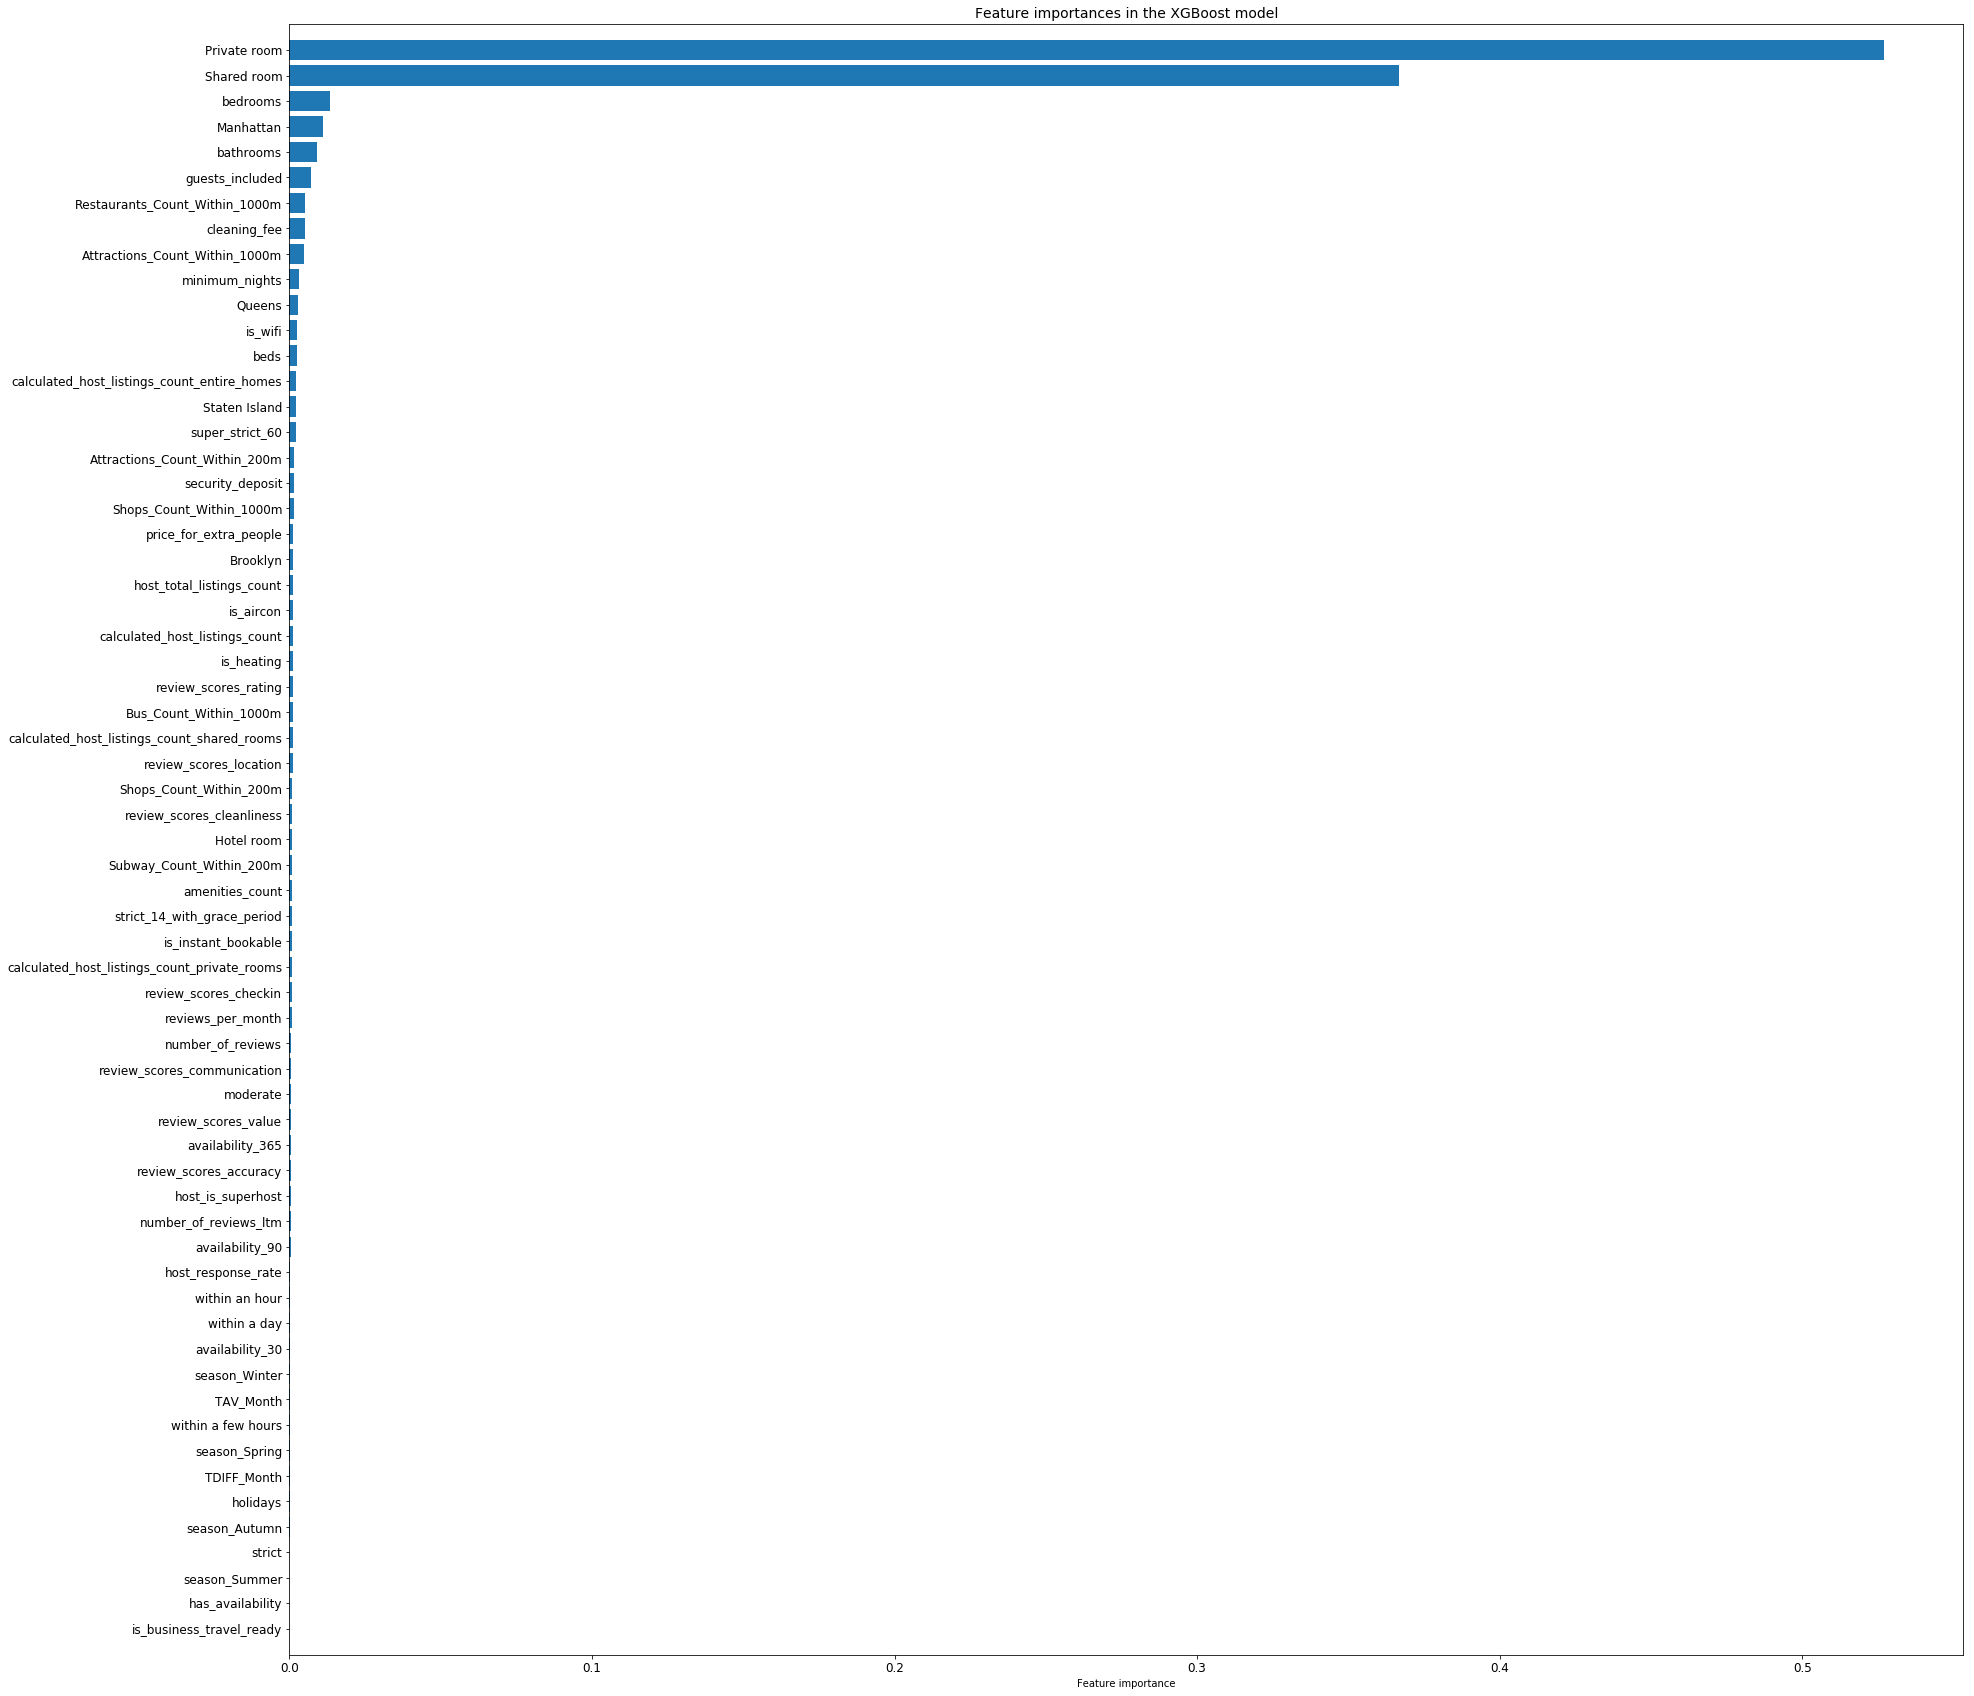

In [106]:
import xgboost as xgb

# Fitting the model
# xgb_reg = xgb.XGBRegressor()
# xgb_reg.fit(X_train, y_train)
# training_preds_xgb_reg = xgb_reg.predict(X_train)
# val_preds_xgb_reg = xgb_reg.predict(X_test)

#xg_reg = xgb.XGBRegressor(learning_rate = 0.05, n_estimators= 500, min_samples_leaf= 20, max_features = 62, max_depth= 10)
xg_reg = xgb.XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
       importance_type='gain', 
       learning_rate=0.075, max_delta_step=0, max_depth=15,
       min_child_weight=4,
       n_estimators=400, n_jobs=1, nthread=1, num_parallel_tree=1,
       objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
       scale_pos_weight=4, silent=True, subsample=0.5,
       validate_parameters=False)
# xg_reg = xgb.XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
#        colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
#        importance_type='gain', interaction_constraints=None,
#        learning_rate=0.075, max_delta_step=0, max_depth=15,
#        min_child_weight=4, monotone_constraints=None,
#        n_estimators=400, n_jobs=1, nthread=1, num_parallel_tree=1,
#        objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
#        scale_pos_weight=4, silent=True, subsample=0.5, tree_method=None,
#        validate_parameters=False, verbosity=None)

xg_reg.fit(X_train[significant_features],y_train)
training_preds_xgb_reg = xg_reg.predict(X_train[significant_features])
test_preds_xgb_reg = xg_reg.predict(X_test[significant_features])
val_preds_xgb_reg = xg_reg.predict(X_val[significant_features])
# Printing the results
#print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("- Train set results:")
evaluate(y_train, training_preds_xgb_reg)
print('\n')
print("- Validation set results:")
evaluate(y_val, val_preds_xgb_reg)
print('\n')
print("- Test set results:")
evaluate(y_test, test_preds_xgb_reg)

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xg_reg.feature_importances_, columns=['weight'], index=X_train[significant_features].columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(30,30))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.margins(y=0.01)
plt.savefig("xgb_with_first2features_best.png",dpi=300)
plt.show()

In [107]:
print("- Validation set results:")
evaluate(y_val, val_preds_xgb_reg)
print('\n')

- Validation set results:
MSE:  124.4541
RMSE:  11.1559
RRMSE:  8.9317
R2:  0.9714




### Neural Network

In [68]:
prediction_data = airbnb_final.drop(['listing_id', 'host_id', 'last_scraped', 'experience', 'host_identity_verified', 'neighbourhood', 
                                     'property_type', 'bed_type', 'require_guest_profile_picture', 'require_guest_phone_verification', 
                                     'year', 'month', 'day', 'month_pad', 'yearmonth','latitude','longitude', 'Weather_type'], axis=1)
features_using = prediction_data.drop(['price'],axis=1).columns
predicting = ['price']

train, test = train_test_split(prediction_data, train_size=0.8, shuffle=True) #Test set is approx 20% of total
train, val = train_test_split(train, train_size=0.8, shuffle=True) #Validation set is approx 16% of total, train set is approx 64% of total

X_train, y_train = train[features_using], train[predicting]
X_val, y_val = val[features_using], val[predicting]
X_test, y_test = test[features_using], test[predicting]

/home/toshal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(512, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(64, activation='relu'))
nn2.add(layers.Dense(16, activation='relu'))
nn2.add(layers.Dense(1, activation='relu'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Printing the model summary
print(nn2.summary())

# Visualising the neural network
#SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

# Training the model
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=1000,
                  batch_size=256,
                  validation_data=(X_val,y_val))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               42496     
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 453,985
Trainable params: 453,985
Non-trainable params: 0
________________________________________________

In [ ]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("- Train set results:")
    evaluate(y_train, y_train_pred)
    print('\n')
    print("- Test set results:")
    evaluate(y_test, y_test_pred)
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.savefig("training_vs_testing_loss.png",dpi=300)
    plt.show
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    plt.savefig("nn_train_and_pred_values.png",dpi=300)
    plt.show()
    
nn_model_evaluation(nn2)

### SVM Regressor

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Fit regression model

## radial basis function
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train, y_train)
rbf_pred_train = svr_rbf.predict(X_train)
rbf_pred_test = svr_rbf.predict(X_test)

# Printing the results
print("- Train set results:")
evaluate(y_train, rbf_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, rbf_pred_test)



## linear
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(X_train, y_train)
lin_pred_train = svr_lin.predict(X_train)
lin_pred_test = svr_lin.predict(X_test)

# Printing the results
print("- Train set results:")
evaluate(y_train, lin_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, lin_pred_test)



## polynomial
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_poly.fit(X_train, y_train)
poly_pred_train = svr_poly.predict(X_train)
poly_pred_test = svr_poly.predict(X_test)

# Printing the results
#print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("- Train set results:")
evaluate(y_train, poly_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, poly_pred_test)


/home/toshal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
